In [26]:
import json

f = open("./10/hubbardpbc-noDMET.json", 'r')
res = json.load(f)
print(res[0].keys())

dict_keys(['U', 'FCI-SpinSQ', 'FCICIS-Energy', 'FCICIS-SpinSQ', 'FCI-SpinZ', 'FCICIS-SpinZ', 'FCI-SiteDM', 'FCICIS-SiteDM', 'TDA-ExtE-Triplet', 'TDA-ExtE-Singlet', 'FCI-Energy'])


In [31]:
n_ext = 6

u_lst = []

trip_cis_1 = []
sing_cis_1 = []
trip_fci_1 = []
trip_fcicis_1 = []

for i in range(1,13):
    u = res[i]["U"]
    u_lst.append(u)

    print([round(x) for x in res[i]["FCI-SpinSQ"]])
    print([round(x) for x in res[i]['FCICIS-SpinSQ']])

[0, 2, 2, 2, 0, 2]
[0, 2, 2, 2, 2, 0]
[0, 2, 0, 2, 2, 2]
[0, 2, 2, 2, 2, 0]
[0, 2, 0, 2, 2, 2]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 2]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 2]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2]
[0, 2, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2]


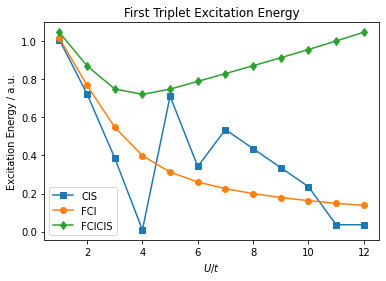

In [42]:
import matplotlib.pyplot as plt

plt.plot(u_lst, trip_cis_1, marker='s', label='CIS')
plt.plot(u_lst, trip_fci_1, marker='o', label='FCI')
plt.plot(u_lst, trip_fcicis_1, marker='d', label='FCICIS')

plt.title("First Triplet Excitation Energy")
plt.xlabel(r"$U/t$")
plt.ylabel("Excitation Energy / a.u.")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


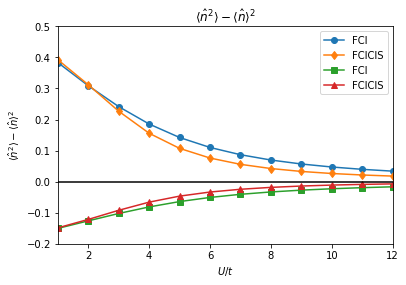

In [23]:
import json
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

u_lst = []
corr_fci = []
corr_cisfci = []
corr_fci_1  = []
corr_cisfci_1 = []

for subres in res:
    u_lst.append(subres['U'])
    corr_fci.append(subres['DM-CORR-FCI'][1][0])
    corr_cisfci.append(subres['DM-CORR-CISFCI'][1][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][1][1])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][1][1])

plt.plot(u_lst, corr_fci, marker='o', label='FCI')
plt.plot(u_lst, corr_cisfci, marker='d', label='FCICIS')
plt.plot(u_lst, corr_fci_1, marker='s', label='FCI')
plt.plot(u_lst, corr_cisfci_1, marker='^', label='FCICIS')

plt.hlines(0,1,12, colors='black')
plt.title(r"$\langle \hat n^2 \rangle - \langle \hat n \rangle ^2 $")
plt.xlim(1,12)
plt.ylim(-0.2,0.5)
plt.xlabel(r"$U/t$")
plt.ylabel(r"$\langle \hat n^2 \rangle - \langle \hat n \rangle ^2 $")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


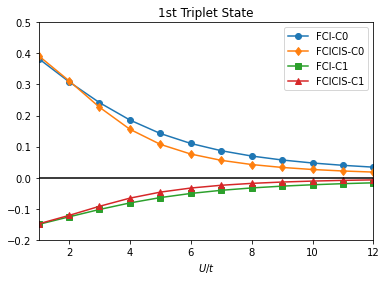

In [60]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci = []
corr_cisfci = []
corr_fci_1  = []
corr_cisfci_1 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idx = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0][0]
    cisfci_idx = np.where(np.array([round(x) for x in subres2["FCICIS-SpinSQ"]])==2.)[0][0]

    corr_fci.append(subres['DM-CORR-FCI'][fci_idx][0])
    corr_cisfci.append(subres['DM-CORR-CISFCI'][fci_idx][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][cisfci_idx][1])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][cisfci_idx][1])

plt.plot(u_lst, corr_fci, marker='o', label='FCI-C0')
plt.plot(u_lst, corr_cisfci, marker='d', label='FCICIS-C0')
plt.plot(u_lst, corr_fci_1, marker='s', label='FCI-C1')
plt.plot(u_lst, corr_cisfci_1, marker='^', label='FCICIS-C1')
plt.title("1st Triplet State")
plt.hlines(0,1,12, colors='black')
plt.xlim(1,12)
plt.ylim(-0.2,0.5)


plt.xlabel(r"$U/t$")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


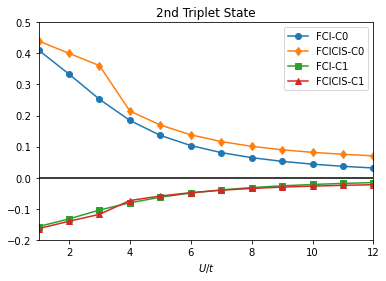

In [79]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci = []
corr_cisfci = []
corr_fci_1  = []
corr_cisfci_1 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idx = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0][1]
    cisfci_idx = np.where(np.array([round(x) for x in subres2["FCICIS-SpinSQ"]])==2.)[0][1]

    corr_fci.append(subres['DM-CORR-FCI'][fci_idx][0])
    corr_cisfci.append(subres['DM-CORR-CISFCI'][fci_idx][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][cisfci_idx][1])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][cisfci_idx][1])

plt.plot(u_lst, corr_fci, marker='o', label='FCI-C0')
plt.plot(u_lst, corr_cisfci, marker='d', label='FCICIS-C0')
plt.plot(u_lst, corr_fci_1, marker='s', label='FCI-C1')
plt.plot(u_lst, corr_cisfci_1, marker='^', label='FCICIS-C1')
plt.title("2nd Triplet State")
plt.hlines(0,1,12, colors='black')
plt.xlim(1,12)
plt.ylim(-0.2,0.5)


plt.xlabel(r"$U/t$")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


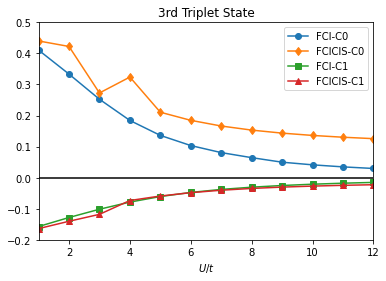

In [62]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci = []
corr_cisfci = []
corr_fci_1  = []
corr_cisfci_1 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idx = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0][2]
    cisfci_idx = np.where(np.array([round(x) for x in subres2["FCICIS-SpinSQ"]])==2.)[0][2]

    corr_fci.append(subres['DM-CORR-FCI'][fci_idx][0])
    corr_cisfci.append(subres['DM-CORR-CISFCI'][fci_idx][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][cisfci_idx][1])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][cisfci_idx][1])

plt.plot(u_lst, corr_fci, marker='o', label='FCI-C0')
plt.plot(u_lst, corr_cisfci, marker='d', label='FCICIS-C0')
plt.plot(u_lst, corr_fci_1, marker='s', label='FCI-C1')
plt.plot(u_lst, corr_cisfci_1, marker='^', label='FCICIS-C1')

plt.title("3rd Triplet State")

plt.hlines(0,1,12, colors='black')
plt.xlim(1,12)
plt.ylim(-0.2,0.5)


plt.xlabel(r"$U/t$")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


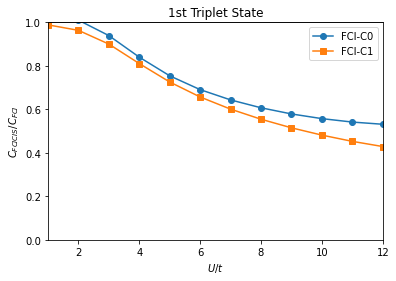

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci = []
corr_cisfci = []
corr_fci_1  = []
corr_cisfci_1 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idx = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0][0]
    cisfci_idx = np.where(np.array([round(x) for x in subres2["FCICIS-SpinSQ"]])==2.)[0][0]

    corr_fci.append(subres['DM-CORR-FCI'][fci_idx][0])
    corr_cisfci.append(subres['DM-CORR-CISFCI'][fci_idx][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][cisfci_idx][1])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][cisfci_idx][1])

plt.plot(u_lst, np.array(corr_cisfci) / np.array(corr_fci), marker='o', label='FCI-C0')
plt.plot(u_lst, np.array(corr_cisfci_1) / np.array(corr_fci_1), marker='s', label='FCI-C1')
plt.hlines(1,1,12, colors='black')

plt.title("1st Triplet State")
plt.ylabel(r"$C_{FCICIS} / C_{FCI}$")

plt.xlim(1,12)
plt.ylim(0,1)
plt.xlabel(r"$U/t$")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


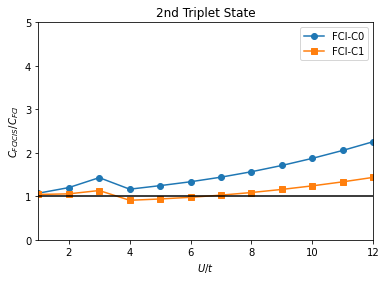

In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci = []
corr_cisfci = []
corr_fci_1  = []
corr_cisfci_1 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idx = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0][1]
    cisfci_idx = np.where(np.array([round(x) for x in subres2["FCICIS-SpinSQ"]])==2.)[0][1]

    corr_fci.append(subres['DM-CORR-FCI'][fci_idx][0])
    corr_cisfci.append(subres['DM-CORR-CISFCI'][fci_idx][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][cisfci_idx][1])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][cisfci_idx][1])

plt.plot(u_lst, np.array(corr_cisfci) / np.array(corr_fci), marker='o', label='FCI-C0')
plt.plot(u_lst, np.array(corr_cisfci_1) / np.array(corr_fci_1), marker='s', label='FCI-C1')
plt.hlines(1,1,12, colors='black')

plt.title("2nd Triplet State")

plt.xlim(1,12)
plt.ylim(0, 5)

plt.ylabel(r"$C_{FCICIS} / C_{FCI}$")
plt.xlabel(r"$U/t$")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


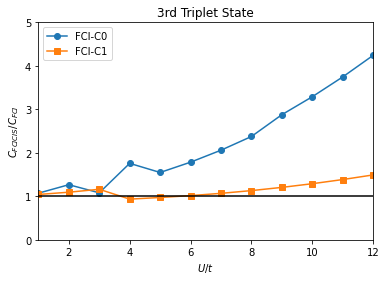

In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci = []
corr_cisfci = []
corr_fci_1  = []
corr_cisfci_1 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idx = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0][2]
    cisfci_idx = np.where(np.array([round(x) for x in subres2["FCICIS-SpinSQ"]])==2.)[0][2]

    corr_fci.append(subres['DM-CORR-FCI'][fci_idx][0])
    corr_cisfci.append(subres['DM-CORR-CISFCI'][fci_idx][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][cisfci_idx][1])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][cisfci_idx][1])

plt.plot(u_lst, np.array(corr_cisfci) / np.array(corr_fci), marker='o', label='FCI-C0')
plt.plot(u_lst, np.array(corr_cisfci_1) / np.array(corr_fci_1), marker='s', label='FCI-C1')
plt.hlines(1,1,12, colors='black')

plt.title("3rd Triplet State")
plt.ylabel(r"$C_{FCICIS} / C_{FCI}$")

plt.xlim(1,12)
plt.ylim(0, 5)
plt.xlabel(r"$U/t$")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


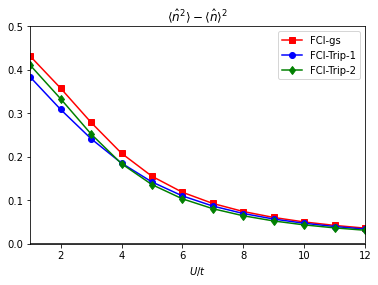

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci_0 = []
corr_fci_1 = []
corr_fci_2 = []
corr_fci_3 = []
corr_cisfci_0 = []
corr_cisfci_1 = []
corr_cisfci_2 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idxs = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0]
    cisfci_idxs = np.where(np.array([round(x) for x in subres2['FCICIS-SpinSQ']])==2.)[0]

    corr_fci_0.append(subres['DM-CORR-FCI'][0][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][fci_idxs[0]][0])
    corr_fci_2.append(subres['DM-CORR-FCI'][fci_idxs[1]][0])

    corr_cisfci_0.append(subres['DM-CORR-CISFCI'][0][0])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][fci_idxs[0]][0])
    corr_cisfci_2.append(subres['DM-CORR-CISFCI'][fci_idxs[1]][0])

plt.plot(u_lst, corr_fci_0, marker='s', label='FCI-gs', color='red')
plt.plot(u_lst, corr_fci_1, marker='o', label='FCI-Trip-1', color='blue')
plt.plot(u_lst, corr_fci_2, marker='d', label='FCI-Trip-2', color='green')
#plt.plot(u_lst, corr_cisfci_0, marker='s', linestyle='--', label='CISFCI-gs', color='#8b0012')
#plt.plot(u_lst, corr_cisfci_1, marker='o', linestyle='-.', label='CISFCI-Trip-1', color='#191981')
#plt.plot(u_lst, corr_cisfci_2, marker='d', linestyle=':', label='CISFCI-Trip-2', color='#114514')


plt.title(r"$\langle \hat n^2 \rangle - \langle \hat n \rangle^2$")
plt.hlines(0,1,12, colors='black')
plt.xlim(1,12)
plt.ylim(0,0.5)

plt.xlabel(r"$U/t$")
plt.legend()
plt.show()

dict_keys(['U', 'DM-CORR-FCI', 'DM-CORR-CISFCI'])


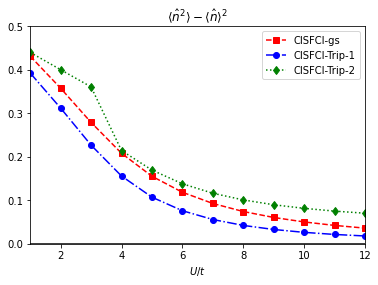

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("./10/hubbard-corr.json", 'r')
res = json.load(f)
print(res[0].keys())

f2 = open("./10/hubbardpbc-noDMET.json", 'r')
res2 = json.load(f2)


u_lst = []
corr_fci_0 = []
corr_fci_1 = []
corr_fci_2 = []
corr_fci_3 = []
corr_cisfci_0 = []
corr_cisfci_1 = []
corr_cisfci_2 = []


for i, subres in enumerate(res):
    u_lst.append(subres['U'])

    subres2 = res2[i+1]

    fci_idxs = np.where(np.array([round(x) for x in subres2["FCI-SpinSQ"]])==2.)[0]
    cisfci_idxs = np.where(np.array([round(x) for x in subres2['FCICIS-SpinSQ']])==2.)[0]

    corr_fci_0.append(subres['DM-CORR-FCI'][0][0])
    corr_fci_1.append(subres['DM-CORR-FCI'][fci_idxs[0]][0])
    corr_fci_2.append(subres['DM-CORR-FCI'][fci_idxs[1]][0])

    corr_cisfci_0.append(subres['DM-CORR-CISFCI'][0][0])
    corr_cisfci_1.append(subres['DM-CORR-CISFCI'][fci_idxs[0]][0])
    corr_cisfci_2.append(subres['DM-CORR-CISFCI'][fci_idxs[1]][0])

#plt.plot(u_lst, corr_fci_0, marker='s', label='FCI-gs', color='red')
#plt.plot(u_lst, corr_fci_1, marker='o', label='FCI-Trip-1', color='blue')
#plt.plot(u_lst, corr_fci_2, marker='d', label='FCI-Trip-2', color='green')
plt.plot(u_lst, corr_cisfci_0, marker='s', linestyle='--', label='CISFCI-gs', color='red')
plt.plot(u_lst, corr_cisfci_1, marker='o', linestyle='-.', label='CISFCI-Trip-1', color='blue')
plt.plot(u_lst, corr_cisfci_2, marker='d', linestyle=':', label='CISFCI-Trip-2', color='green')


plt.title(r"$\langle \hat n^2 \rangle - \langle \hat n \rangle^2$")
plt.hlines(0,1,12, colors='black')
plt.xlim(1,12)
plt.ylim(0,0.5)

plt.xlabel(r"$U/t$")
plt.legend()
plt.show()